In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1)Load the data into the pandas environment and identify some basic details of the dataset.

In [58]:
# loading data set
df=pd.read_csv('employee.csv')

In [59]:
df

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [60]:
df.shape

(9, 7)

In [61]:
df.columns

Index(['name', 'age', 'income', 'gender', 'department', 'grade',
       'performance_score'],
      dtype='object')

In [62]:
df.index

RangeIndex(start=0, stop=9, step=1)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [64]:
df.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [65]:
df.nunique()

name                 9
age                  5
income               7
gender               2
department           3
grade                4
performance_score    9
dtype: int64

In [66]:
df.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


### 2) Reset the index as "name"

In [67]:
df=pd.read_csv('employee.csv',index_col='name')
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 3) Select rows for specific names Jack Morgan and Josh wills.

In [68]:
df.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


### 4) Select data for multiple values "Sales" and “Finance”.

In [69]:
df_multiple = (df[ (df['department'] == 'Finance') + ( df['department'] =='Sales' )])
df_multiple

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [70]:
#Other method
df.loc[ df['department'].isin(['Sales','Finance'])]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 5)Display employee who has more than 700 performance score

In [71]:
df[df.performance_score > 700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 6) Display employee who has more than 500 and less than 700 performance score

In [72]:
df[(df.performance_score > 500)&(df.performance_score < 700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


### 7) Check and handle missing values in the dataset

In [73]:
df.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [74]:
df.dtypes

age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

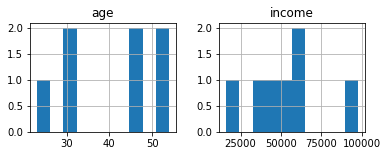

In [75]:
freqgraph=df.select_dtypes(include=['float'])
freqgraph.hist(figsize=(6,2))
plt.show()

In [76]:
df['age']=df['age'].fillna(df['age'].mean())

In [77]:
df['income']=df['income'].fillna(df['income'].mean())

In [78]:
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000000,52857.142857,NaN,Operations,G3,723
S Kumar,40.428571,16000.000000,F,Finance,G0,520
Jack Morgan,32.000000,35000.000000,M,Finance,G2,674
Ying Chin,45.000000,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.000000,42000.000000,F,Operations,G2,711
Satyam Sharma,40.428571,62000.000000,NaN,Sales,G3,649
James Authur,54.000000,52857.142857,F,Operations,G3,53
Josh Wills,54.000000,52000.000000,F,Finance,G3,901
Leo Duck,23.000000,98000.000000,M,Sales,G4,709


In [79]:
#The null values in gender column can be filled logicaly by looking at the name of employees, both Allen Smith and Satyam Sharma are the names of Male Employees

df=df.fillna({'gender':'M'},limit=2)

In [80]:
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000000,52857.142857,M,Operations,G3,723
S Kumar,40.428571,16000.000000,F,Finance,G0,520
Jack Morgan,32.000000,35000.000000,M,Finance,G2,674
Ying Chin,45.000000,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.000000,42000.000000,F,Operations,G2,711
Satyam Sharma,40.428571,62000.000000,M,Sales,G3,649
James Authur,54.000000,52857.142857,F,Operations,G3,53
Josh Wills,54.000000,52000.000000,F,Finance,G3,901
Leo Duck,23.000000,98000.000000,M,Sales,G4,709


### 8) Check the outliers and handle outliers in performance score using Percentiles.

Text(0.5, 1.0, 'Box plot of performance_score')

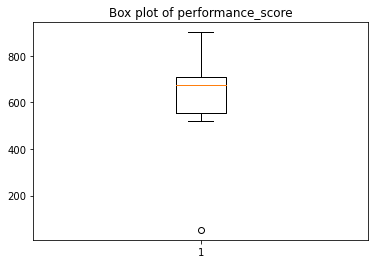

In [81]:
plt.boxplot(df['performance_score'])
plt.title('Box plot of performance_score')

In [82]:
Q1= np.percentile(df.performance_score, 25)
Q2=np.percentile(df.performance_score, 50)
Q3=np.percentile(df.performance_score, 75)

In [83]:
print(Q1,Q2,Q3)

556.0 674.0 711.0


In [84]:
IQR=Q3-Q1
IQR

155.0

In [85]:
Low_lim=Q1-1.5*IQR
Up_lim=Q3+1.5*IQR
print(Low_lim,Up_lim)

323.5 943.5


In [86]:
outliers=df[(df.performance_score<Low_lim)]
outliers

,age,income,gender,department,grade,performance_score
name,,,,,,
James Authur,54.0,52857.142857,F,Operations,G3,53


In [87]:
df.drop(['James Authur'],inplace=True)

In [88]:
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000000,52857.142857,M,Operations,G3,723
S Kumar,40.428571,16000.000000,F,Finance,G0,520
Jack Morgan,32.000000,35000.000000,M,Finance,G2,674
Ying Chin,45.000000,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.000000,42000.000000,F,Operations,G2,711
Satyam Sharma,40.428571,62000.000000,M,Sales,G3,649
Josh Wills,54.000000,52000.000000,F,Finance,G3,901
Leo Duck,23.000000,98000.000000,M,Sales,G4,709


Text(0.5, 1.0, 'Box plot of performance_score')

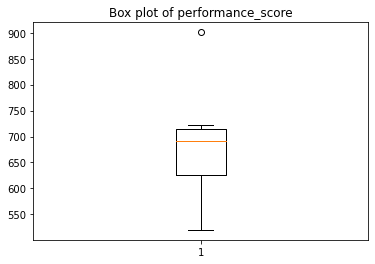

In [89]:
plt.boxplot(df['performance_score'])
plt.title('Box plot of performance_score')

In [90]:
df.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

### 9) Check the gender column and do Dummy encoding

In [91]:
df.gender.nunique()

2

In [92]:
df1=pd.get_dummies(df,columns=['gender'],drop_first=True)

In [93]:
df1

,age,income,department,grade,performance_score,gender_M
name,,,,,,
Allen Smith,45.000000,52857.142857,Operations,G3,723,1
S Kumar,40.428571,16000.000000,Finance,G0,520,0
Jack Morgan,32.000000,35000.000000,Finance,G2,674,1
Ying Chin,45.000000,65000.000000,Sales,G3,556,0
Dheeraj Patel,30.000000,42000.000000,Operations,G2,711,0
Satyam Sharma,40.428571,62000.000000,Sales,G3,649,1
Josh Wills,54.000000,52000.000000,Finance,G3,901,0
Leo Duck,23.000000,98000.000000,Sales,G4,709,1


### 10)Do the standard scaling on the feature performance score

In [94]:
from sklearn.preprocessing import StandardScaler
standardisation= StandardScaler()
df['performance_score'] = standardisation.fit_transform(df[['performance_score']])
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000000,52857.142857,M,Operations,G3,0.392262
S Kumar,40.428571,16000.000000,F,Finance,G0,-1.475872
Jack Morgan,32.000000,35000.000000,M,Finance,G2,-0.058667
Ying Chin,45.000000,65000.000000,F,Sales,G3,-1.144578
Dheeraj Patel,30.000000,42000.000000,F,Operations,G2,0.281831
Satyam Sharma,40.428571,62000.000000,M,Sales,G3,-0.288733
Josh Wills,54.000000,52000.000000,F,Finance,G3,2.030331
Leo Duck,23.000000,98000.000000,M,Sales,G4,0.263425
